In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('airlines.csv')
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


#### There can often be multiple paths from one airport to another, and the aim is to find the shortest possible path between all the airports. There are two ways in which we can define a path as the shortest:

1.By distance                                                                                                     
2.By air time

#### We can convert the problem to a graph by representing all the airports as vertices, and the route between them as edges.

##### We notice that origin and destination look like good choices for Nodes. Everything can then be imagined as either node or edge attributes. A single edge can be thought of as a journey. And such a journey will have various times, a flight number, an airplane tail number etc associated with it

In [4]:
FG = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True) # It store the vertices, edges automatically.

In [5]:
FG.nodes()   # nodes (or vertices)

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

In [6]:
FG.edges()      # all edges (or links) between nodes

EdgeView([('IAD', 'TPA'), ('IAD', 'LAS'), ('IAD', 'MCO'), ('IAD', 'MDW'), ('TPA', 'IND'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('TPA', 'LAS'), ('TPA', 'MCI'), ('TPA', 'MDW'), ('TPA', 'MHT'), ('TPA', 'MSY'), ('TPA', 'ORF'), ('TPA', 'PBI'), ('TPA', 'PHL'), ('TPA', 'PHX'), ('TPA', 'PIT'), ('TPA', 'PVD'), ('TPA', 'RDU'), ('TPA', 'SAT'), ('TPA', 'SDF'), ('TPA', 'STL'), ('TPA', 'ABQ'), ('TPA', 'ALB'), ('TPA', 'AUS'), ('TPA', 'BDL'), ('TPA', 'BHM'), ('TPA', 'BNA'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'CMH'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'HOU'), ('IND', 'BWI'), ('IND', 'JAX'), ('IND', 'LAS'), ('IND', 'MCI'), ('IND', 'MCO'), ('IND', 'MDW'), ('IND', 'PHX'), ('BWI', 'ISP'), ('BWI', 'JAN'), ('BWI', 'JAX'), ('BWI', 'LAS'), ('BWI', 'LIT'), ('BWI', 'MCI'), ('BWI', 'MCO'), ('BWI', 'MDW'), ('BWI', 'MHT'), ('BWI', 'MSY'), ('BWI', 'OKC'), ('BWI', 'ORF'), ('BWI', 'PBI'), ('BWI', 'PHX'), ('BWI', 'PIT'), ('BWI', 'PVD'), ('BWI', 'RDU'), ('BWI', 'RSW'), ('BWI', 'SAN'), ('BWI', 'SAT'), ('BWI', 'SDF')

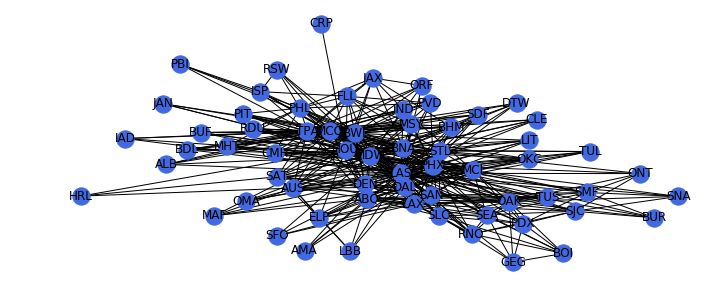

In [12]:
plt.figure(figsize=(12,5))

nx.draw_networkx(FG, with_labels=True, node_color='royalblue')      # create the graph

plt.axis('off')
plt.show()

In [8]:
print('Degree Centarlity : \n', nx.algorithms.degree_centrality(FG) )

Degree Centarlity : 
 {'IAD': 0.06349206349206349, 'TPA': 0.49206349206349204, 'IND': 0.12698412698412698, 'BWI': 0.6031746031746031, 'JAX': 0.14285714285714285, 'LAS': 0.8571428571428571, 'MCI': 0.31746031746031744, 'MCO': 0.5238095238095237, 'MDW': 0.746031746031746, 'PHX': 0.6666666666666666, 'ISP': 0.12698412698412698, 'FLL': 0.19047619047619047, 'PBI': 0.06349206349206349, 'RSW': 0.07936507936507936, 'JAN': 0.06349206349206349, 'HOU': 0.4603174603174603, 'BHM': 0.20634920634920634, 'BNA': 0.42857142857142855, 'ORF': 0.09523809523809523, 'PHL': 0.25396825396825395, 'ABQ': 0.3492063492063492, 'ALB': 0.07936507936507936, 'AMA': 0.06349206349206349, 'AUS': 0.25396825396825395, 'BDL': 0.09523809523809523, 'BOI': 0.1111111111111111, 'BUF': 0.09523809523809523, 'BUR': 0.07936507936507936, 'CLE': 0.09523809523809523, 'CMH': 0.14285714285714285, 'DEN': 0.25396825396825395, 'ELP': 0.15873015873015872, 'GEG': 0.09523809523809523, 'LAX': 0.2857142857142857, 'LBB': 0.07936507936507936, 'LIT': 

In [9]:
print('Density : \n', nx.density(FG) ) 

Density : 
 0.20386904761904762


In [10]:
print('Average shortest path length :\n', nx.average_shortest_path_length(FG) )

Average shortest path length :
 1.8695436507936507


In [11]:
print('Average Degree : \n', nx.average_degree_connectivity(FG) )

Average Degree : 
 {4: 33.875, 31: 16.193548387096776, 8: 32.55, 38: 15.131578947368421, 9: 29.25925925925926, 54: 13.12962962962963, 20: 20.975, 33: 15.454545454545455, 47: 14.382978723404255, 42: 15.595238095238095, 12: 22.708333333333332, 5: 29.133333333333333, 29: 18.482758620689655, 13: 28.076923076923077, 27: 19.22222222222222, 6: 32.648148148148145, 16: 23.791666666666668, 22: 20.772727272727273, 7: 32.142857142857146, 10: 23.1, 18: 21.055555555555557, 11: 24.272727272727273, 17: 22.41176470588235, 14: 22.75, 15: 12.733333333333333, 3: 19.333333333333332, 1: 29.0}


#### The above visualization represents the different flight routes. Suppose a passenger wants to take the shortest route from AMA to PBI.

###### By Distance

In [64]:
shortest_path_distance = nx.dijkstra_path(FG,source='AMA',target='PBI', weight='Distance')  # weight--> 'Distance' is column 
shortest_path_distance

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

###### By Air-Time

In [66]:
shortest_air_distance = nx.dijkstra_path(FG,source='AMA',target='PBI', weight='AirTime')  # weirht-> 'AirTime' is column 
shortest_air_distance

['AMA', 'DAL', 'BHM', 'TPA', 'PBI']

## ----------------------------------------------------------------------------------------------------

#### We notice that the year, month, day and time information is spread over many columns. We want to create one datetime column containing all of this information.

#### 1st rename column 'DayofMonth' --> 'Day'  , bcoz pandas  pd.to_datetime()  take (Year, Month, Day)  to convert into date column index.

#### Then we drop ['Year', 'Month', 'Day', 'DayOfWeek'] not needed then.

In [20]:
data.rename(columns={'DayofMonth':'Day'}, inplace=True)   

data['Date'] = pd.to_datetime(data[['Year','Month','Day']])

In [22]:
data.drop(columns=['Year', 'Month', 'Day', 'DayOfWeek'], inplace=True)    # not required now

In [23]:
data.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance,Date
0,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810,2008-01-03
1,754.0,735,1002.0,1000,113.0,IAD,TPA,810,2008-01-03
2,628.0,620,804.0,750,76.0,IND,BWI,515,2008-01-03
3,926.0,930,1054.0,1100,78.0,IND,BWI,515,2008-01-03
4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515,2008-01-03
